In [1]:
from pyiron import Project, ase_to_pyiron
import matplotlib.pyplot as plt
import numpy as np
from pyiron import Project
from ase.io import read, write
from pyiron import ase_to_pyiron
import ase
import os
import time
import sys  
sys.path.insert(0, '/nfshome/deshmukh/vaibhav/scripts')
import analysis_msd as ms 

In [2]:
# Project  
pr = Project("/nfshome/deshmukh/pyiron/projects/NASICON/project/padone_pot/new_ordered_glass") 

In [3]:
# Basic calculations 
O = 15.999400*12 #*648 #(O)
Na = 22.989769*3 #*162 #(Na)
Zr = 91.223999*2 #*108 #(Zr)
Si = 28.085501*2 #*108 #(Si)
P = 30.973763 #*54 #(P)
mol_mass = (O+Na+Zr+Si+P) # (g/mol)
no_atoms = 20   # Each NASICON contains at x=3 
total_nasicon = 1080/20  # 54 
avo_no = 6.022*10**(23)
mas_mol = mol_mass/avo_no  # (g/molecule)

def density(volume):
    density = total_nasicon*mas_mol/(volume*1e-24) # g/cm3
    sp_volume = 1/density  # cm3/g
    return density, sp_volume   

# Calculate quech rate and time 
rate = range(1,11,1)
m_keep = []     # steps to evalute Tg (Cook and quench)
for i in rate:
    time = (3000/i)*1000
    m_keep.append(round(time)/100)
intial_skip = 2600  # Heating and equilibration
next_skip = 200+5+5 # NPT+NVT+NVE      

In [4]:
# lets plot temp vs steps 
st = []
tm = []
st_old = []
tm_old = []
st_s = []
tm_s = []
st_n = []
tm_n = []
for i in range(1,2,1):
    job = pr['boilot_443K_2_05_amo_s_1_1_rate_%s_k_ps'%i]   
    st.append(job['output/generic/steps'])   #g/cm3
    tm.append(job['output/generic/temperature'])
    job_old = pr['boilot_443K_2_05_amo_s_1_1_old_2_rate_%s_k_ps'%i]   
    st_old.append(job_old['output/generic/steps'])   #g/cm3
    tm_old.append(job_old['output/generic/temperature'])
    job_s = pr['boilot_443K_2_05_amo_s_1_1_schulze_rate_%s_k_ps'%i]   
    st_s.append(job_s['output/generic/steps'])   #g/cm3
    tm_s.append(job_s['output/generic/temperature'])
    job_n = pr['boilot_443K_2_05_amo_s_1_1_new_1_rate_%s_k_ps'%i]   
    st_n.append(job_n['output/generic/steps'])   #g/cm3
    tm_n.append(job_n['output/generic/temperature'])

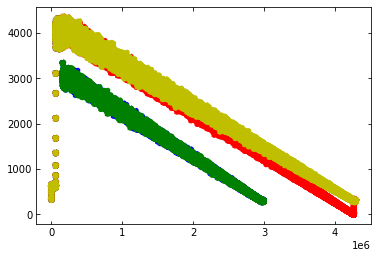

In [5]:
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,5)
#plt.xlim([100, 3300])
#plt.ylim([0.1, 0.250])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
plt.scatter(st,tm, linestyle='--', color = 'b', linewidth=1)
plt.scatter(st_old,tm_old, linestyle='--', color = 'g', linewidth=1)
plt.scatter(st_s,tm_s, linestyle='--', color = 'r', linewidth=1)
plt.scatter(st_n,tm_n, linestyle='--', color = 'y', linewidth=1)

In [6]:
den = []
tm = []
for i in range(2650,29600,135):
    job = pr['boilot_443K_2_05_amo_s_1_1_rate_1_k_ps']   
    den.append((total_nasicon*mas_mol)/(job['output/generic/volume'][2650:i]*1e-24))   #g/cm3
    tm.append(job['output/generic/temperature'][2650:i])

den_s = []
tm_s = []
for i in range(1,2,1):
    job = pr['boilot_443K_2_05_amo_s_1_1_schulze_rate_%s_k_ps'%i]   
    den_s.append((total_nasicon*mas_mol)/(job['output/generic/volume'][2651:42600]*1e-24))   #g/cm3
    tm_s.append(job['output/generic/temperature'][2651:42600])

den_n = []
tm_n = []
for i in range(1,2,1):
    job = pr['boilot_443K_2_05_amo_s_1_1_new_1_rate_%s_k_ps'%i]   
    den_n.append((total_nasicon*mas_mol)/(job['output/generic/volume'][2651:42600]*1e-24))   #g/cm3
    tm_n.append(job['output/generic/temperature'][2651:42600])

den_o = []
tm_o = []
for i in range(1,2,1):
    job = pr['boilot_443K_2_05_amo_s_1_1_old_2_rate_%s_k_ps'%i]   
    den_o.append((total_nasicon*mas_mol)/(job['output/generic/volume'][2651:29600]*1e-24))   #g/cm3
    tm_o.append(job['output/generic/temperature'][2651:29600])

den_c = []
tm_c = []
for i in range(1,2,1):
    job = pr['boilot_443K_2_05_amo_s_1_1_schulze_rate_%s_k_ps'%i]   
    den_c.append((total_nasicon*mas_mol)/(job['output/generic/volume'][2601:2800]*1e-24))   #g/cm3
    tm_c.append(job['output/generic/temperature'][2601:2800])

In [43]:
d = []
t = []
for i,j in zip(den,tm):
    for k,l in zip(i,j):
        d.append(k)
        t.append(l)

In [59]:
x ,y = ms.msd.smooth_msd_data(x=t,y=d)
#x, y = ms.msd.roll_mean(data_1=t,data_2=d,window=50)

1811.5518159926773


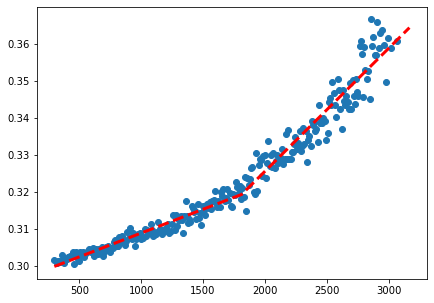

In [70]:
import pwlf
    
my_pwlf = pwlf.PiecewiseLinFit(x[::50],1/y[::50])
breaks = my_pwlf.fit(2) 
x_hat_1 = np.linspace(np.min(t), np.max(t), 200)
y_hat_1 = my_pwlf.predict(x_hat_1)
plt.plot(x_hat_1, y_hat_1, '--r', linewidth=3)
plt.scatter(x[::100],1/y[::100])
print(breaks[1])

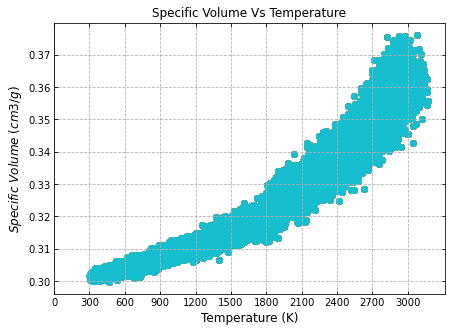

In [37]:
# Plot density vs temp and predict glass transition 
for i,j in zip(tm,den):
    plt.rcParams["figure.facecolor"] = "w"
    plt.rcParams["figure.figsize"] = (7,5)
    #plt.xlim([300, 2800])
    #plt.ylim([0.1, 0.250])
    plt.tick_params(bottom=True, top=True, left=True, right=True)
    plt.tick_params(axis="y",direction="in")
    plt.tick_params(axis="x",direction="in")
    plt.scatter(i,1/j, label='$Quench$ = 1 K/ps')
    plt.grid(which='both')
    plt.grid(True, linestyle='--')
    plt.xticks(np.arange(0,3300,300))
    plt.title("Specific Volume Vs Temperature")
    plt.xlabel(r"Temperature (K)", fontsize=12)
    plt.ylabel("$Specific$ $Volume$ $(cm3/g)$", fontsize=12)
    #plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")  #, bbox_to_anchor=(1.05,1.0))
    #plt.savefig("specific_vol_vs_temp_1.png", bbox_inches='tight', dpi=600, transparent=False)

In [ ]:

for i,j in zip(tm,den,range(2,11,1)):
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,5)
#plt.xlim([100, 3300])
#plt.ylim([0.1, 0.250])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
my_pwlf = pwlf.PiecewiseLinFit(i, 1/j)
breaks = my_pwlf.fit(2) 
x_hat = np.linspace(np.min(tm_1), np.max(tm_1), 30)
y_hat = my_pwlf.predict(x_hat)
plt.plot(x_hat, y_hat, '--k', linewidth=3)
plt.scatter(i,1/j, label='$Quench$ = {} K/ps , $Tg$ = {:.2f} K'.format(a,breaks[1]))
#plt.scatter(x_hat, y_hat, s=50, facecolors='none')
# poly1d_fn is now a function which takes in x and returns an estimate for y
#plt.scatter(i,1/j, s=20, facecolors='none', edgecolors='y')
#plt.axvline(x=breaks[1], linestyle='--', color='k', label='$Tglass$ = {:.2f} K'.format(breaks[1]))
#plt.plot(i,j, 'go', i, my_pwlf.predict(i), '--r')
plt.xticks(np.arange(0,3300,300))
plt.grid(which='both')
plt.grid(True, linestyle='--')
plt.title("Specific Volume Vs Temperature")
plt.xlabel(r"Temperature (K)", fontsize=12)
plt.ylabel("$Specific$ $Volume$ $(cm3/g)$", fontsize=12)
#plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black",bbox_to_anchor=(1.05,1.0))
#plt.savefig("specific_vol_vs_temp_1_fit.png", bbox_inches='tight', dpi=600, transparent=False)

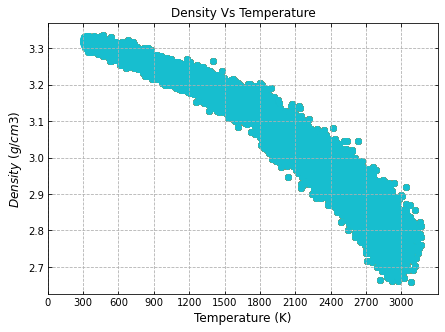

In [67]:
for i,j in zip(tm,den):
    plt.rcParams["figure.facecolor"] = "w"
    plt.rcParams["figure.figsize"] = (7,5)
    #plt.xlim([300, 2800])
    #plt.ylim([0.1, 0.250])
    plt.tick_params(bottom=True, top=True, left=True, right=True)
    plt.tick_params(axis="y",direction="in")
    plt.tick_params(axis="x",direction="in")
    plt.scatter(i,j, label='$Quench$ = 1 K/ps')
    plt.grid(which='both')
    plt.grid(True, linestyle='--')
    plt.xticks(np.arange(0,3300,300))
    plt.title("Density Vs Temperature")
    plt.xlabel(r"Temperature (K)", fontsize=12)
    plt.ylabel("$Density$ $(g/cm3)$", fontsize=12)
    #plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")  #, bbox_to_anchor=(1.05,1.0))
    #plt.savefig("specific_vol_vs_temp_1.png", bbox_inches='tight', dpi=600, transparent=False)